# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle

training_file = "./dataset/train.p"
validation_file= "./dataset/valid.p"
testing_file = "./dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

In [2]:
import csv
sign_labels = {}
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    sign_labels = {key: val for key, val in reader}

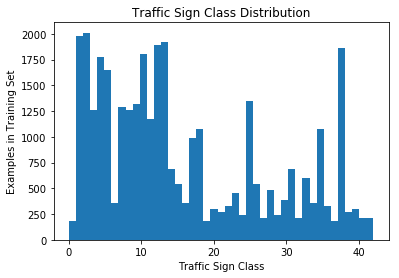

MAX: 2010.0
MIN: 180.0


In [3]:
import cv2
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the histogram of the data
n, bins, patches = plt.hist(y_train, 43, histtype='bar')
plt.title("Traffic Sign Class Distribution")
plt.xlabel("Traffic Sign Class")
plt.ylabel("Examples in Training Set")
plt.show()

print("MAX: {}".format(max(n)))
print("MIN: {}".format(min(n)))

## Preprocess Data

Shuffle the training data.

In [4]:
def equalize_hist_color(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    ycrcb[:,:,0] = cv2.equalizeHist(ycrcb[:,:,0])
    return cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2RGB)

def normalize_img(img):
    return (img / 255.) - 0.5

def preprocess(images):
#     i, r, c, ch = images.shape
#     out = np.empty((i,r,c), dtype=np.uint8)
#     for i in range(out.shape[0]):
#         out[i] = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    return images

X_train_process = preprocess(X_train)
X_valid_process = preprocess(X_valid)
X_test_process = preprocess(X_test)

In [ ]:
def rand_warp_img(img, degree):
    s = img.shape[0]
    d = lambda: np.random.randint(0, (s*degree))

    pts1 = np.float32([[0,0],[s,0],[s,s],[0,s]])
    diff = np.float32([[d(),d()],[-d(),d()],[-d(),-d()],[d(),-d()]])
    pts2 = pts1 + diff
    M = cv2.getPerspectiveTransform(pts2, pts1)
    out = cv2.warpPerspective(img, M, (32,32))
    return out

In [ ]:
import matplotlib.gridspec as gridspec

indices = np.random.randint(X_train.shape[0], size=30)
sample_imgs = X_train[indices]

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(20,10))
for i in range(len(sample_imgs)):
    a = plt.subplot(gs1[i])
    a.axis("off")
    a.set_aspect('equal')
    new_img = sample_imgs[i]
    plt.subplot(10,10,i+1)
    plt.imshow(new_img, cmap="gray")
    plt.axis('off')

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(20,10))
for i in range(len(sample_imgs)):
    a = plt.subplot(gs1[i])
    a.axis("off")
    a.set_aspect('equal')
    new_img = equalize_hist_color(sample_imgs[i])
    plt.subplot(10,10,i+1)
    plt.imshow(new_img, cmap="gray")
    plt.axis('off')

plt.show()

In [ ]:
def augment_dataset(X, y):
    X_aug = np.copy(X)
    y_aug = np.copy(y)
    
    for i in range(X.shape[0]):
        label = y_aug[i]
        aug_img = rand_warp_img(X_aug[i], .3)
        X_aug = np.append(X_aug, [aug_img], axis=0)
        y_aug = np.append(y_aug, label)
    
    assert X_aug.shape[0] == y_aug.shape[0]
    return X_aug, y_aug

print(X_train.shape)
print(y_train.shape)
%time X_aug, y_aug = augment_dataset(X_train, y_train)
print(X_aug.shape)
print(y_aug.shape)

np.save('dataset/data_aug.npy', {'X':X_aug,'y':y_aug})

In [ ]:
import matplotlib.gridspec as gridspec

img = X_train[0]

gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(100):
    a = plt.subplot(gs1[i])
    a.axis("off")
    a.set_aspect('equal')
    new_img = rand_warp_img(img, 0.3)
    plt.subplot(10,10,i+1)
    plt.imshow(new_img, cmap="gray")
    plt.axis('off')

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [10]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [6]:
# Store layers weight & bias
mu = 0
sigma = 0.1
weight_var = lambda shape: tf.Variable(tf.truncated_normal(shape, mean=mu, stddev=sigma))
bias_var = lambda n: tf.Variable(tf.zeros(n))

weights = {
    'wc1': weight_var((5,5,3,6)),
    'wc2': weight_var((5,5,6,16)),
    'fc1': weight_var((400,120)),
    'fc2': weight_var((120,84)),
    'out': weight_var((84,43))}

biases = {
    'bc1': bias_var(6),
    'bc2': bias_var(16),
    'bd1': bias_var(120),
    'bd2': bias_var(84),
    'out': bias_var(43)}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=(1,strides,strides,1), padding="VALID")
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def pool(x, k=2):
    return tf.nn.max_pool(x, ksize=(1,k,k,1), strides=(1,k,k,1), padding="VALID")

def fc(x, W, b, activate_layer=True):
    x = tf.add(tf.matmul(x, W), b)
    if activate_layer:
        x = tf.nn.relu(x)
    return x

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    x = conv2d(x, weights['wc1'], biases['bc1'])

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    x = pool(x, k=2)

    # Layer 2: Convolutional. Output = 10x10x16.
    x = conv2d(x, weights['wc2'], biases['bc2'])

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    x = pool(x, k=2)

    # Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    x = fc(x, weights['fc1'], biases['bd1'])

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    x = fc(x, weights['fc2'], biases['bd2'])

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    return fc(x, weights['out'], biases['out'], activate_layer=False)

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [9]:
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_process)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_process, y_train = shuffle(X_train_process, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_process[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_process, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.606

EPOCH 2 ...
Validation Accuracy = 0.762

EPOCH 3 ...
Validation Accuracy = 0.803

EPOCH 4 ...
Validation Accuracy = 0.824

EPOCH 5 ...
Validation Accuracy = 0.829

EPOCH 6 ...
Validation Accuracy = 0.836

EPOCH 7 ...
Validation Accuracy = 0.842

EPOCH 8 ...
Validation Accuracy = 0.847

EPOCH 9 ...
Validation Accuracy = 0.862

EPOCH 10 ...
Validation Accuracy = 0.857

EPOCH 11 ...
Validation Accuracy = 0.850

EPOCH 12 ...
Validation Accuracy = 0.861

EPOCH 13 ...
Validation Accuracy = 0.857

EPOCH 14 ...
Validation Accuracy = 0.859

EPOCH 15 ...
Validation Accuracy = 0.867

EPOCH 16 ...
Validation Accuracy = 0.880

EPOCH 17 ...
Validation Accuracy = 0.874

EPOCH 18 ...
Validation Accuracy = 0.890

EPOCH 19 ...
Validation Accuracy = 0.871

EPOCH 20 ...
Validation Accuracy = 0.866

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))